Transform the file into a format with “Record ID,” “Task Name,” “Adherence,” and “Quality” as the columns.

Reshape and pivote DataFrame with task names connected by hyphens "-"

In [3]:
import pandas as pd

# Let's load the uploaded file and reshape it as requested
file_path = '/Users/rachelwang/Downloads/B2AI_Team1(Sheet1).csv'

# Load the CSV file
df_uploaded = pd.read_csv(file_path)

# Transpose and reshape the DataFrame to the desired format
reshaped_data_uploaded = []
for index, row in df_uploaded.iterrows():
    record_id = row["record-id"]
    for column in df_uploaded.columns:
        if column != "record-id":
            task, metric = column.rsplit("-", 1)
            task = task.replace(" ", "-")
            reshaped_data_uploaded.append([record_id, task, metric, row[column]])

reshaped_df_uploaded = pd.DataFrame(reshaped_data_uploaded, columns=["Record ID", "Task Name", "Metric", "Value"])

# Pivot the table to get the desired format
pivot_df_uploaded = reshaped_df_uploaded.pivot_table(index=["Record ID", "Task Name"], columns="Metric", values="Value", dropna=False).reset_index()

# Rename columns
pivot_df_uploaded.columns.name = None
pivot_df_uploaded.rename(columns={"Record ID": "pid", "Task Name": "task", "adherence": "adherence", "quality": "quality"}, inplace=True)

# Save the reshaped DataFrame to a new CSV file for user to download
output_file_path_na = '/Users/rachelwang/Downloads/notes/models/csv/reshaped_pivoted_data_including_na.csv'
pivot_df_uploaded.to_csv(output_file_path_na, index=False)

output = pd.read_csv('/Users/rachelwang/Downloads/notes/models/csv/reshaped_pivoted_data_including_na.csv')
output.head()

,pid,task,adherence,quality
0,01401050-e9dd-486e-b0d4-0001ee7f861d,Animal-fluency,NaN,NaN
1,01401050-e9dd-486e-b0d4-0001ee7f861d,Breath-Sounds,NaN,NaN
2,01401050-e9dd-486e-b0d4-0001ee7f861d,Cape-V-sentences-1,NaN,NaN
3,01401050-e9dd-486e-b0d4-0001ee7f861d,Cape-V-sentences-2,NaN,NaN
4,01401050-e9dd-486e-b0d4-0001ee7f861d,Cape-V-sentences-3,NaN,NaN


Find all .wav files in nested folders

Extract the record ID and task name

In [4]:
import os

def find_and_extract_wav_files(directory):
    extracted_info = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.wav'):
                full_path = os.path.join(root, file)
                filename = os.path.splitext(file)[0]  # Remove the '.wav' extension
                split_filename = filename.split('_')
                
                # Extracting record id and task name
                record_id = ''
                task_name = ''
                for part in split_filename:
                    if part.startswith('sub-'):
                        record_id = part.replace('sub-', '')
                    elif part.startswith('rec-'):
                        task_name = part.replace('rec-', '')

                extracted_info.append((full_path, record_id, task_name))
    return extracted_info

# Example usage:
directory_path = '/Users/rachelwang/Downloads/bids_with_sensitive_recordings' 
wav_files_info = find_and_extract_wav_files(directory_path)
for full_path, record_id, task_name in wav_files_info:
    print(f"Full Path: {full_path}")
    print(f"Record ID: {record_id}")
    print(f"Task Name: {task_name}")

Full Path: /Users/rachelwang/Downloads/bids_with_sensitive_recordings/sub-1f9475bb-f13b-4f68-969b-28f20455b3e7/ses-CB8A74EE-0C8C-4B15-B322-D93A79ADB40A/audio/sub-1f9475bb-f13b-4f68-969b-28f20455b3e7_ses-CB8A74EE-0C8C-4B15-B322-D93A79ADB40A_Free-speech_rec-Free-speech-2.wav
Record ID: 1f9475bb-f13b-4f68-969b-28f20455b3e7
Task Name: Free-speech-2
Full Path: /Users/rachelwang/Downloads/bids_with_sensitive_recordings/sub-1f9475bb-f13b-4f68-969b-28f20455b3e7/ses-CB8A74EE-0C8C-4B15-B322-D93A79ADB40A/audio/sub-1f9475bb-f13b-4f68-969b-28f20455b3e7_ses-CB8A74EE-0C8C-4B15-B322-D93A79ADB40A_Word-color-Stroop_rec-Word-color-Stroop.wav
Record ID: 1f9475bb-f13b-4f68-969b-28f20455b3e7
Task Name: Word-color-Stroop
Full Path: /Users/rachelwang/Downloads/bids_with_sensitive_recordings/sub-1f9475bb-f13b-4f68-969b-28f20455b3e7/ses-CB8A74EE-0C8C-4B15-B322-D93A79ADB40A/audio/sub-1f9475bb-f13b-4f68-969b-28f20455b3e7_ses-CB8A74EE-0C8C-4B15-B322-D93A79ADB40A_Loudness_rec-Loudness.wav
Record ID: 1f9475bb-f13b-4

Merge audio file with labeled file.

In [5]:
# Convert the extracted info into a DataFrame
wav_df = pd.DataFrame(wav_files_info, columns=['file', 'pid', 'task'])

# Read the CSV file
csv_file_path = 'csv/reshaped_pivoted_data_including_na.csv'
csv_data = pd.read_csv(csv_file_path)

# Merge the DataFrames based on 'Record ID' and 'Task Name'
merged_df = pd.merge(wav_df, csv_data, how='left', on=['pid', 'task'])

# Reorder columns to match the desired output
merged_df = merged_df[['pid', 'task', 'adherence', 'quality', 'file']]

# Save the merged DataFrame to a new CSV file
merged_df.to_csv('csv/merged_data_with_audio.csv', index=False)

merged = pd.read_csv('csv/merged_data_with_audio.csv')
merged.head()

,pid,task,adherence,quality,file
0,1f9475bb-f13b-4f68-969b-28f20455b3e7,Free-speech-2,NaN,NaN,/Users/rachelwang/Downloads/bids_with_sensitiv...
1,1f9475bb-f13b-4f68-969b-28f20455b3e7,Word-color-Stroop,NaN,NaN,/Users/rachelwang/Downloads/bids_with_sensitiv...
2,1f9475bb-f13b-4f68-969b-28f20455b3e7,Loudness,5.0,4.0,/Users/rachelwang/Downloads/bids_with_sensitiv...
3,1f9475bb-f13b-4f68-969b-28f20455b3e7,Free-speech-3,NaN,NaN,/Users/rachelwang/Downloads/bids_with_sensitiv...
4,1f9475bb-f13b-4f68-969b-28f20455b3e7,Free-speech-1,NaN,NaN,/Users/rachelwang/Downloads/bids_with_sensitiv...


1.	Adherence Labeled Data:
•	Contains rows where adherence is labeled.
•	Columns: pid, task, adherence, file
2.	Adherence Non-Labeled Data:
•	Contains rows where adherence is not labeled.
•	Columns: pid, task, adherence, file
3.	Quality Labeled Data:
•	Contains rows where quality is labeled.
•	Columns: pid, task, quality, file
4.	Quality Non-Labeled Data:
•	Contains rows where quality is not labeled.
•	Columns: pid, task, quality, file


In [6]:
data = merged
# Filter data into four separate dataframes based on the criteria
adherence_labeled = data[data['adherence'].notna()][['pid', 'task', 'adherence', 'file']]
adherence_non_labeled = data[data['adherence'].isna()][['pid', 'task', 'adherence', 'file']]
quality_labeled = data[data['quality'].notna()][['pid', 'task', 'quality', 'file']]
quality_non_labeled = data[data['quality'].isna()][['pid', 'task', 'quality', 'file']]

# Save these dataframes to CSV files
adherence_labeled.to_csv('csv/adherence_labeled.csv', index=False)
adherence_non_labeled.to_csv('csv/adherence_non_labeled.csv', index=False)
quality_labeled.to_csv('csv/quality_labeled.csv', index=False)
quality_non_labeled.to_csv('csv/quality_non_labeled.csv', index=False)

adherence_labeled_head = adherence_labeled.head()
adherence_labeled_head

,pid,task,adherence,file
2,1f9475bb-f13b-4f68-969b-28f20455b3e7,Loudness,5.0,/Users/rachelwang/Downloads/bids_with_sensitiv...
9,1f9475bb-f13b-4f68-969b-28f20455b3e7,Respiration-and-cough-Breath-2,5.0,/Users/rachelwang/Downloads/bids_with_sensitiv...
11,1f9475bb-f13b-4f68-969b-28f20455b3e7,Respiration-and-cough-FiveBreaths-1,5.0,/Users/rachelwang/Downloads/bids_with_sensitiv...
13,1f9475bb-f13b-4f68-969b-28f20455b3e7,Cinderella-Story,5.0,/Users/rachelwang/Downloads/bids_with_sensitiv...
14,1f9475bb-f13b-4f68-969b-28f20455b3e7,Productive-Vocabulary-3,5.0,/Users/rachelwang/Downloads/bids_with_sensitiv...


In [12]:
def count_labels(df, column):
    counts = df[column].value_counts(dropna=False).sort_index()
    return counts

adherence_counts = count_labels(merged_df, 'adherence')
quality_counts = count_labels(merged_df, 'quality')

print("Adherence Counts:")
print(adherence_counts)

print("Quality Counts:")
print(quality_counts)

Adherence Counts:
adherence
1.0      25
2.0      14
3.0      31
4.0     124
5.0     581
NaN    6060
Name: count, dtype: int64
Quality Counts:
quality
1.0      17
2.0      18
3.0      27
4.0     125
5.0     612
NaN    6036
Name: count, dtype: int64


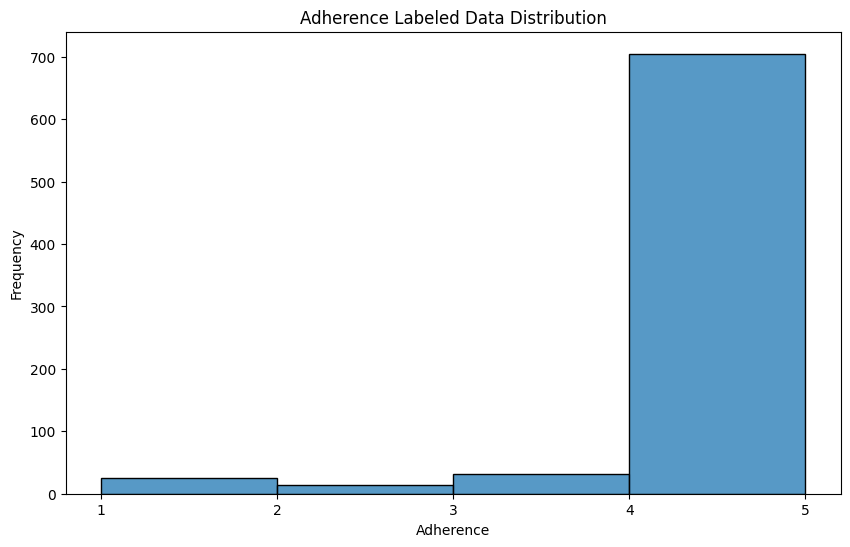

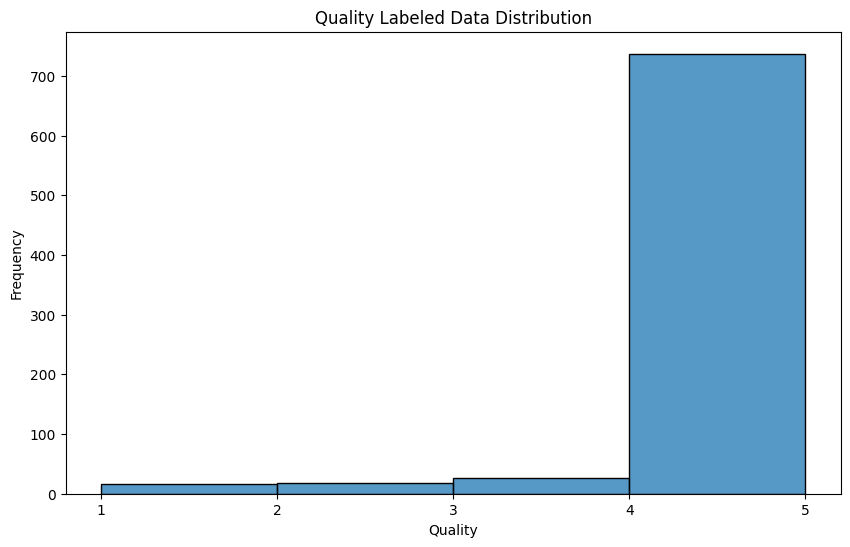

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualize the data
def plot_data_distribution(df, column, title):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column].dropna(), bins=[1, 2, 3, 4, 5])
    plt.title(title)
    plt.xlabel(column.capitalize())
    plt.ylabel('Frequency')
    plt.xticks([1, 2, 3, 4, 5])
    plt.show()

# Assuming adherence_labeled and quality_labeled are already defined DataFrames
plot_data_distribution(adherence_labeled, 'adherence', 'Adherence Labeled Data Distribution')
plot_data_distribution(quality_labeled, 'quality', 'Quality Labeled Data Distribution')